# Problem 1: Short Answer Questions


**Answer below concisely** <br>

<ol>  
    
  <li> Describe how Lagrangian Duality has affected the Machine Learning models of Support Vector Regression. </li> <br>
       
  <li> Describe the relationship between Physics-Informed ML and Lagrangian Duality. </li> <br>
    
  <li> List three ways that mechanistic equations can be integrated with data-driven models. For each of the three, clearly explain the structure of the overall model. </li> <br>
    
</ol>
  

## Answer Problem 1 Here:

### 1.1:  
The dual formulation helps in transforming the modeling problem into a space where variables are Lagrange multipliers (independent of dimensionality of problem). This dual problem is easier to solve and should give us same solution as original Primal. Because of dual space formulation, we can fit nonlinear SVR functions and still have the same formulation size and complexity as the linear formulations



### 1.2: 

For the physics-informed ML approach, the formulation is :
$$
Min_{inputs} (\text { SSE }_{t})
$$

$$\text {such that}$$

$$
\text{SSE}_{p} = 0
$$

dual problem:
$$
Max_\lambda Min_{inputs} (\text { SSE }_{t} + \lambda* \text { SSE }_{p})
$$

If the constraints for the physics calculation remain noncovex in the primal, then the dual will be an underestimator. If the Primal is entirely convex wrt the parameters, then we should be able to find the global solution and the dual gap will be zero



### 1.3:

$\textbf{Model correction}$ : When a part of the mechanistic model is incorrect/missing, a data-driven model is used to add / (replace that part) and correct the model prediction

$\textbf{Model identification}$ : A data-driven model is used to identify the physics of the model and formulate the model itself by utilizing the available mechanistic equations

$\textbf{Physics-Informed Machine Learning}$ : A data-driven model is trained to predict the outputs such that the model satifies known mechanistic equations. In general, this is achieved by ustilizing these known mechanistic equations as additional constraints when training the data-driven model

## Problem 2 (Principal Component Analysis):

The data set that is provided as an excel sheet was collected during a study that measured different compositions of particulates in the air, as well as different conditions of the weather on the days of the measurements (Features 1-13, or F1, ..., F13). Each row corresponds to a different measurement at a different day and time, and each column corresponds to features that were measured (concentrations of chemicals in air and weather conditions like Temperature, humidity, etc. There are a total of 13 features (columns) and you want to perform some analysis on this data set. 

A. Your colleague recommends that you perform Principal Component Analysis on this data set first. Before doing any analysis, do you agree with this decision and why? List three reasons why PCA could be used for this data set, based on your expectations of the characteristics of the data set. <br> 

B. Write code to perform PCA on this data set (you can use any resource you like for this). Decide how many principal components are needed and why, and identify whether some inputs are correlated etc.


### Answer Problem 2 here:


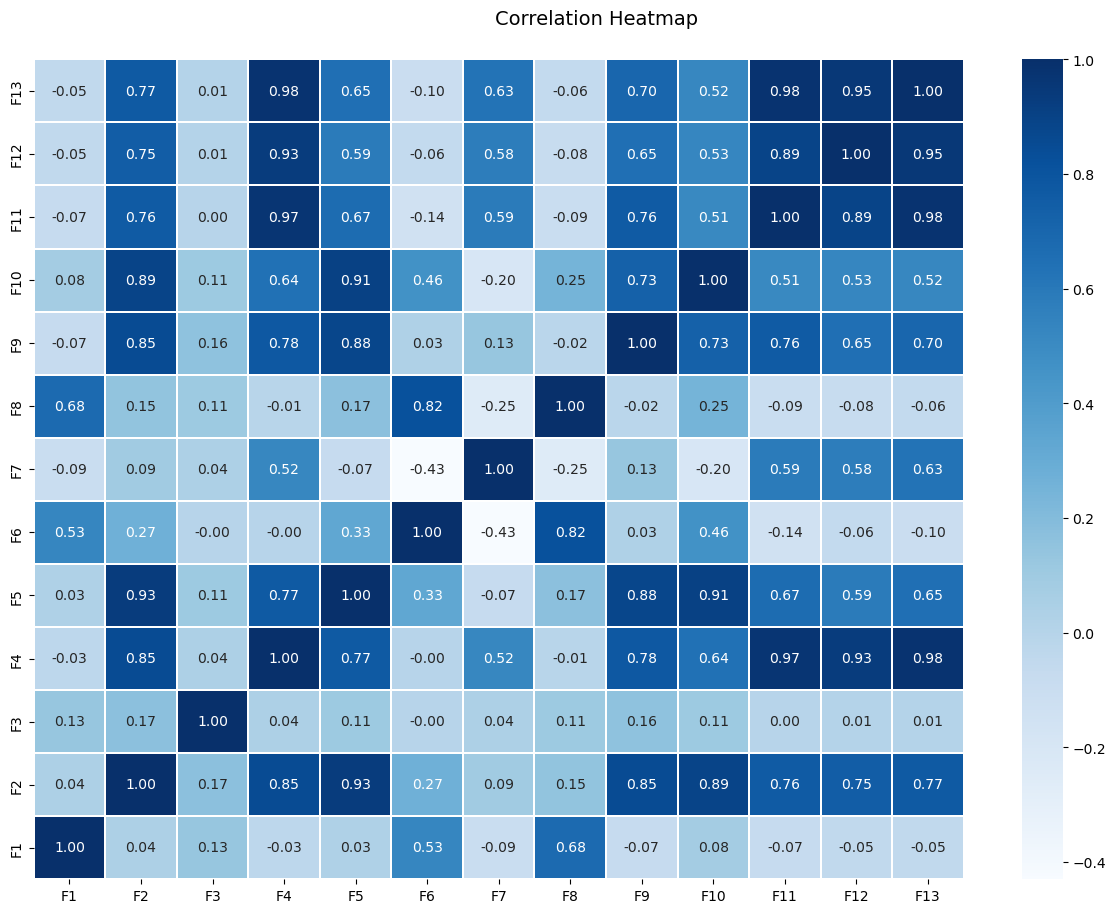

In [1]:
# Coding for Problem 2 here:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## import data
data = pd.read_excel('Problem2_hw5.xlsx',nrows=9132)
## split inputs and outputs
X1=data[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']]

xlabels = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']


#check correlations first

''' We can directly calculate the correlation values to check if the variables are correlated. 
For example we can use pearson correlation to find the correlation value between two variables '''
#------------------------------------------------------------------------------------------------------- 
def plot_correlation(df,colNames):
    
    """ Plot correlation matrix """
    fig, ax = plt.subplots(figsize=(15, 10))
    corr = df.corr()
    hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="Blues", fmt='.2f',
                     linewidths=.05, xticklabels=colNames.T, yticklabels=colNames.T)
    fig.subplots_adjust(top=0.93)
    t = fig.suptitle('Correlation Heatmap', fontsize=14)
    bottom = 0
    top = len(df.columns)
    ax.set_ylim(bottom, top)
plot_correlation(data,np.array(xlabels))


PC1: 50.82%
PC2: 22.62%
PC3: 10.82%
PC4: 7.92%
PC5: 3.02%
PC6: 1.88%
PC7: 1.00%
PC8: 0.80%
PC9: 0.58%
PC10: 0.30%
PC11: 0.22%
PC12: 0.02%
PC13: 0.00%
-------------------------------------------------------------------------------------------------------------
* variance captured by the  6  PCs :  97.0720795454642 %
-------------------------------------------------------------------------------------------------------------


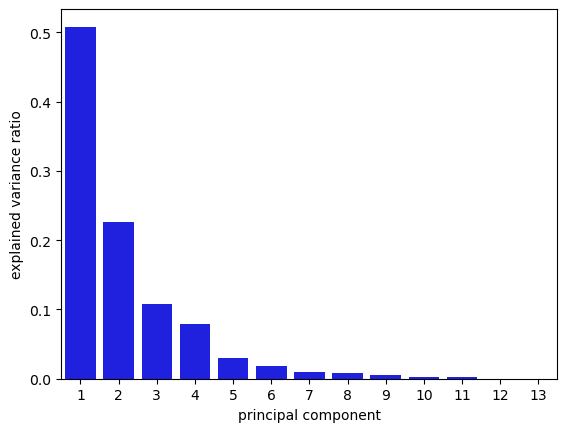

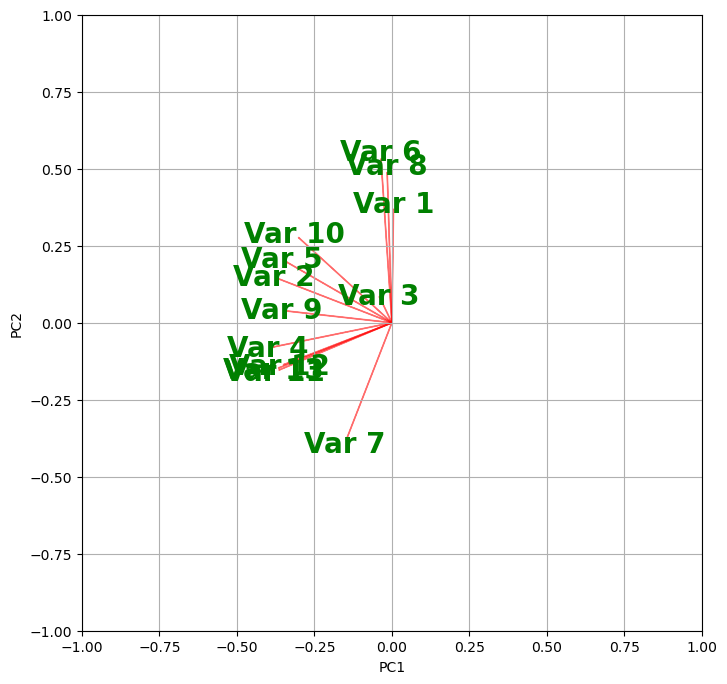

In [2]:
#now perform PCA to reduce dimension
''' to perform PCA, data should be scaled before, or the magnitude of the variable affects the captured variance values'''

X1 = StandardScaler().fit_transform(X1)
pca = PCA().fit(X1)
#print(pca.explained_variance_ratio_)
for i, evr in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {evr:.2%}")
print('-------------------------------------------------------------------------------------------------------------')
print('* variance captured by the ', str(6),' PCs : ',str(np.sum(pca.explained_variance_ratio_[0:6])*100), '%')
print('-------------------------------------------------------------------------------------------------------------')
#------------------------------------------------------------------------------------------------------- 
    
fig, ax = plt.subplots()
sns.barplot(x = np.arange(1, len(pca.explained_variance_ratio_)+1), y = pca.explained_variance_ratio_, color='blue')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()


# define function to plot loading plot
def loading_plot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, "Var " + str(i + 1), color='g', ha='center', va='center', size=20, weight='bold')
        else:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, labels[i], color='g', ha='center', va='center', size=20, weight='bold')

fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# call the function with the first two PCs
loading_plot(pca.components_[:,0:2], np.transpose(pca.components_[0:2, :]))
plt.show()

# $\color{blue}{\text{ Written type answers here:  }}$


$\textit{part A:}$

Although PCA can be directly applied, we can check the correlations between the variables first and then perform PCA. 

Why does PCA apply for this dataset?

$\textbf{Dimensionality reduction:}$ PCA can be used in this case for reducing the number of variables in a dataset while preserving the most important information. This can help to reduce computational complexity and improve the performance of machine learning algorithms, for example if they are used for regression.

$\textbf{Feature selection for modeling:}$ By analyzing the PCs, we can identify which variables are most important in explaining the variance of the data. This can help to identify the most influential features and guide feature selection for modeling tasks.

$\textbf{Removing correlated variables:}$ We saw that the variables in this dataset are highly correlated, PCA can be used to identify and remove these correlations.




$\textit{part B:}$

We can also check if the variables are correlated using the loadings plot. For example, the features 11, 12 and 13 are highly correlated, 5&10, 6&8 are correlated.

## Problem 3: Principal Component Analysis

The data loaded below is a large dataset containing various features for many patients tested for breast cancer. It is unclear whether all of the 30 measured inputs are independent. 

Your colleague performed PCA on this data set and reports that with only 2 PCs, they can capture almost all of the variability in the data. And only very few features measured are important. 


A. Explain how they came to this conclusion, based on the results and figures shown below. Which features are truly important and why?

B. You disagree with above conclusion and take another close look at the analysis.  What would you change and why? How are the conclusions revised after you make this change? (How many PCs, what features are important, correlated etc)? 



PC1: 98.20%
PC2: 1.62%
PC3: 0.16%
PC4: 0.01%
PC5: 0.01%
PC6: 0.00%
PC7: 0.00%
PC8: 0.00%
PC9: 0.00%
PC10: 0.00%
PC11: 0.00%
PC12: 0.00%
PC13: 0.00%
PC14: 0.00%
PC15: 0.00%
PC16: 0.00%
PC17: 0.00%
PC18: 0.00%
PC19: 0.00%
PC20: 0.00%
PC21: 0.00%
PC22: 0.00%
PC23: 0.00%
PC24: 0.00%
PC25: 0.00%
PC26: 0.00%
PC27: 0.00%
PC28: 0.00%
PC29: 0.00%
PC30: 0.00%
-------------------------------------------------------------------------------------------------------------
* variance captured by the  10  PCs :  99.99998946838417 %
-------------------------------------------------------------------------------------------------------------


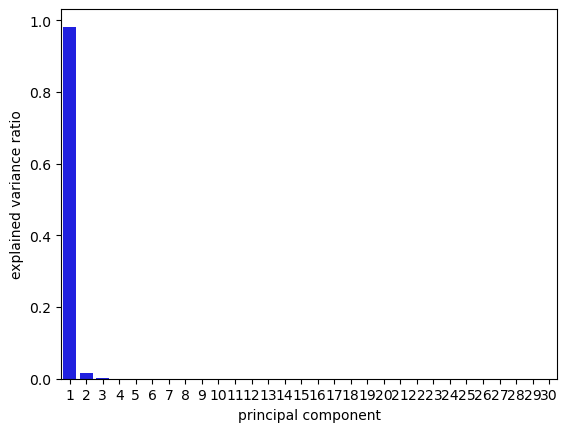

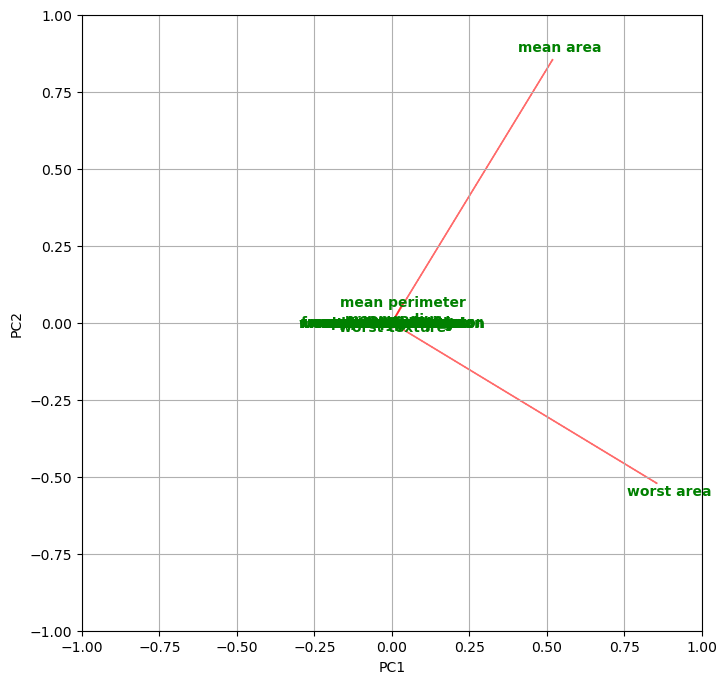

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

## import data
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()
X1 = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])
x_labels = X1.columns


pca = PCA().fit(X1)
for i, evr in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {evr:.2%}")
print('-------------------------------------------------------------------------------------------------------------')
print('* variance captured by the ', str(10),' PCs : ',str(np.sum(pca.explained_variance_ratio_[0:10])*100), '%')
print('-------------------------------------------------------------------------------------------------------------')
#------------------------------------------------------------------------------------------------------- 
    
fig, ax = plt.subplots()
sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_)+1),y=pca.explained_variance_ratio_ ,color='blue')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()


# define function to plot loading plot
def loading_plot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, "Var " + str(i + 1), color='g', ha='center', va='center', size=10, weight='bold')
        else:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, labels[i], color='g', ha='center', va='center', size=10, weight='bold')

fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# call the function with the first two PCs
loading_plot(pca.components_[:,0:2], np.transpose(pca.components_[0:2, :]), x_labels)
plt.show()

# $\color{blue}{\text{ Written type answers here:  }}$


$\textit{part A:}$
Explain how they came to this conclusion, based on the results and figures shown below. Which features are truly important and why?

The variance captured by the first two PCs is almost 100%, so this could be the reason for their conclusion that only 2 PCs are required. Based on the loadings plot, variables $\textit{mean area & worst area}$ are the most contributing features.

$\textit{part B:}$
You disagree with above conclusion and take another close look at the analysis. What would you change and why? How are the conclusions revised after you make this change? (How many PCs, what features are important, correlated etc)?

Yes, I disagree with the analyis here. The data used for PCA is not standardized, so the explained variance ratio is incorrect and is misleading. After standardizing, the variance captured by the first 10 PCs changed to 95%, and I would atleast keep a dimension of 8 to be able to capture >90% variance in the data

variables such as $\textit{ (mean perimeter & mean area)}$, $\textit{(mean compactness, mean concavity & mean concave points)}$, $\textit{(worst compactness, worst concavity & worst concave points) }$ etc, seem to be highly correlated

### Answer Problem 3 here:


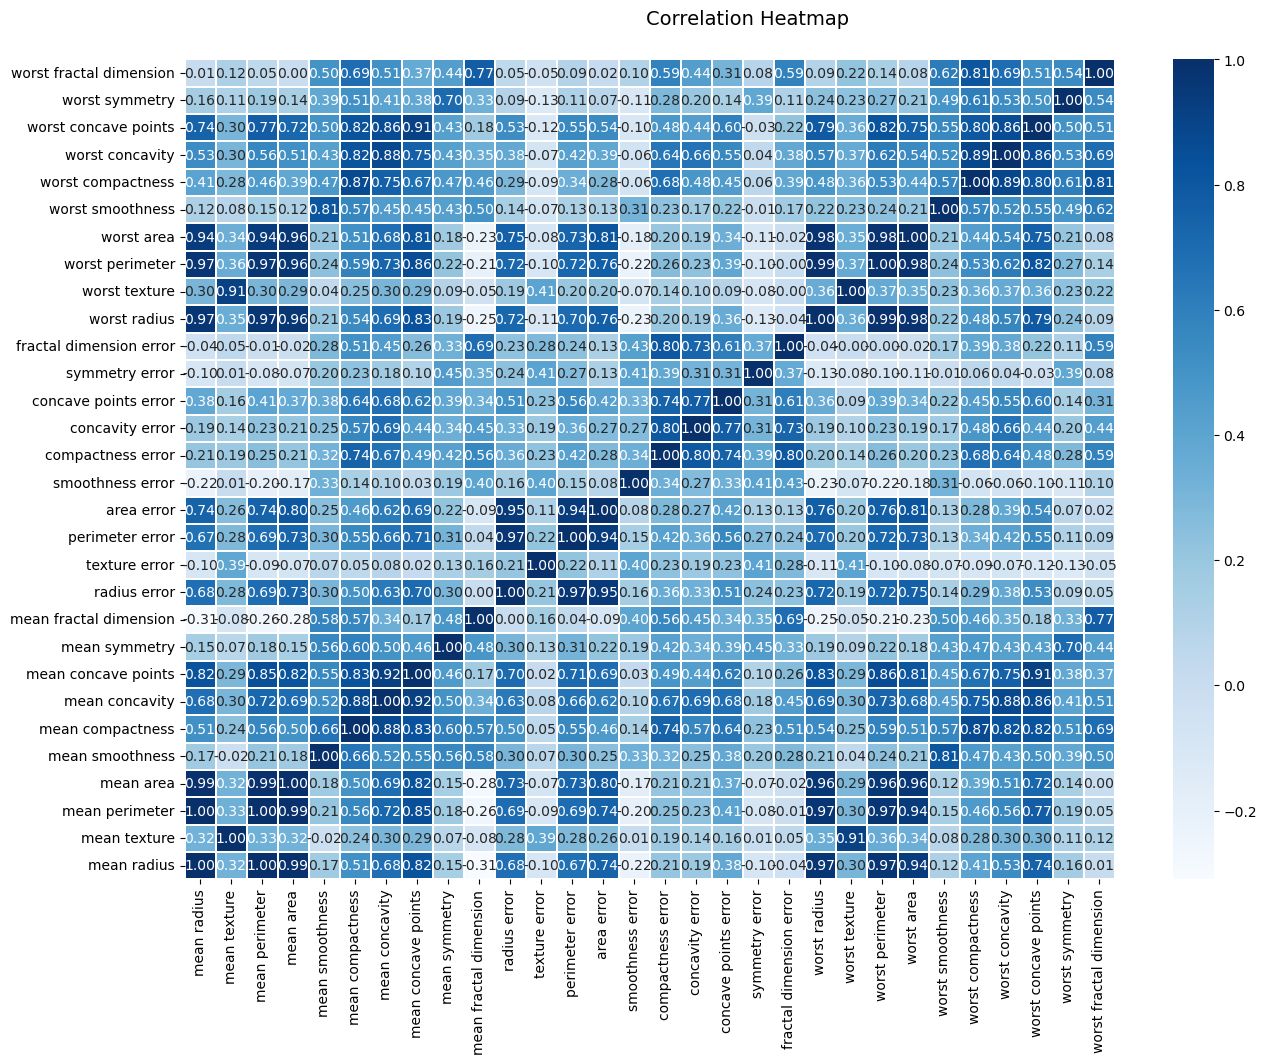

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

## import data
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()
X1 = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])
x_labels = X1.columns


#check correlations first

''' We can directly calculate the correlation values to check if the variables are correlated. 
For example we can use pearson correlation to find the correlation value between two variables '''
#------------------------------------------------------------------------------------------------------- 
def plot_correlation(df,colNames):
    
    """ Plot correlation matrix """
    fig, ax = plt.subplots(figsize=(15, 10))
    corr = df.corr()
    hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="Blues", fmt='.2f',
                     linewidths=.05, xticklabels=colNames.T, yticklabels=colNames.T)
    fig.subplots_adjust(top=0.93)
    t = fig.suptitle('Correlation Heatmap', fontsize=14)
    bottom = 0
    top = len(df.columns)
    ax.set_ylim(bottom, top)
plot_correlation(X1,np.array(x_labels))

PC1: 44.27%
PC2: 18.97%
PC3: 9.39%
PC4: 6.60%
PC5: 5.50%
PC6: 4.02%
PC7: 2.25%
PC8: 1.59%
PC9: 1.39%
PC10: 1.17%
PC11: 0.98%
PC12: 0.87%
PC13: 0.80%
PC14: 0.52%
PC15: 0.31%
PC16: 0.27%
PC17: 0.20%
PC18: 0.18%
PC19: 0.16%
PC20: 0.10%
PC21: 0.10%
PC22: 0.09%
PC23: 0.08%
PC24: 0.06%
PC25: 0.05%
PC26: 0.03%
PC27: 0.02%
PC28: 0.01%
PC29: 0.00%
PC30: 0.00%
-------------------------------------------------------------------------------------------------------------
* variance captured by the  10  PCs :  95.15688143366667 %
-------------------------------------------------------------------------------------------------------------


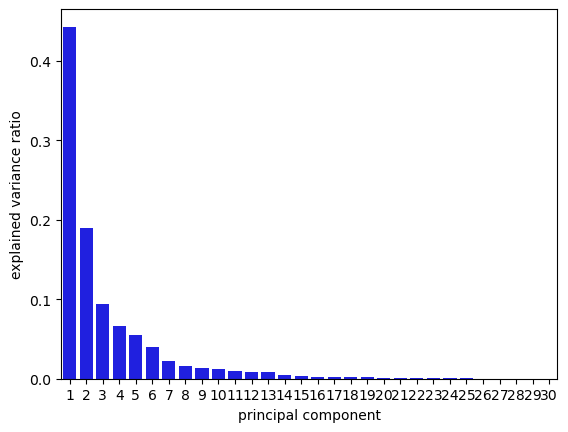

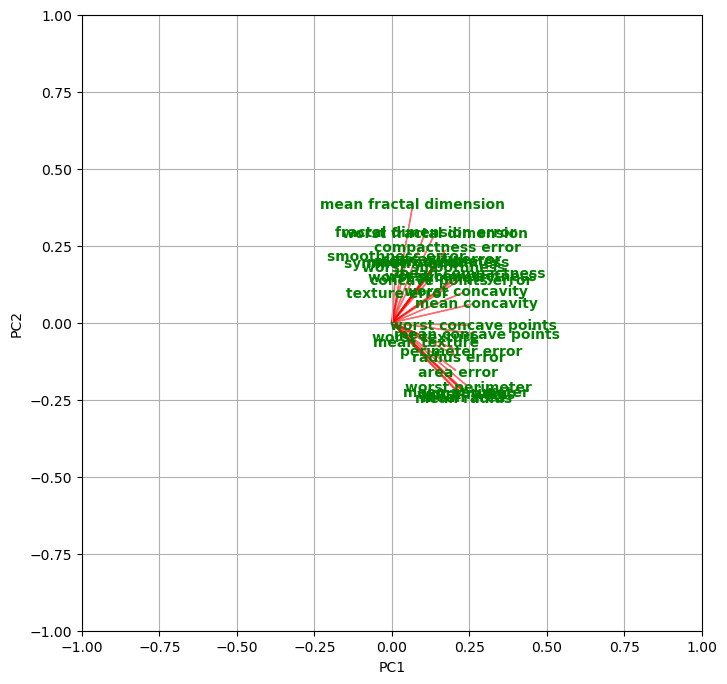

In [5]:
#now perform PCA to reduce dimension
''' to perform PCA, data should be scaled before, or the magnitude of the variable affects the captured variance values'''

X1 = StandardScaler().fit_transform(X1)
pca = PCA().fit(X1)
for i, evr in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {evr:.2%}")
print('-------------------------------------------------------------------------------------------------------------')
print('* variance captured by the ', str(10),' PCs : ',str(np.sum(pca.explained_variance_ratio_[0:10])*100), '%')
print('-------------------------------------------------------------------------------------------------------------')
#------------------------------------------------------------------------------------------------------- 
    
fig, ax = plt.subplots()
sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_)+1),y=pca.explained_variance_ratio_ ,color='blue')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()


# define function to plot loading plot
def loading_plot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, "Var " + str(i + 1), color='g', ha='center', va='center', size=10, weight='bold')
        else:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, labels[i], color='g', ha='center', va='center', size=10, weight='bold')

fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# call the function with the first two PCs
loading_plot(pca.components_[:,0:2], np.transpose(pca.components_[0:2, :]), x_labels)
plt.show()

## Problem 4: Neural Network Training

A black-box function with 2 inputs (known that they are independent and important inputs) that affect a single output is provided below (as done in Homework 4). Sample the function using a Latin Hypercube design of 21 points (stricly 21 points only). Using the limited samples that you have, write code to train a Neural Network regression model in Python (feel free to use any resources including course resources and online resources to make this code). Train it so that it has a low number of parameters (essentially explain how you trained it with more parameters (i.e., layers and/or nodes, and reduce down to an architecture that still fits the data equally well, or use an automated procedure to select the best architecture).  

To evaluate whether your fit is a good one, report: 
(a) an error metric (MSE, MAE, R2), 
(b) show a parity plot of predicted vs. actual data 
(c) plot 3d surfaces of your NN fit and the actual model for visual comparison. 

In [6]:
# Coding for Problem 4 here:
import numpy as np
import pyDOE as doe
import matplotlib.pyplot as plt

## Define the black box function
def bb(x1,x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2

## Answer Problem 4 here:

Text(0.5, 1.0, 'LHS')

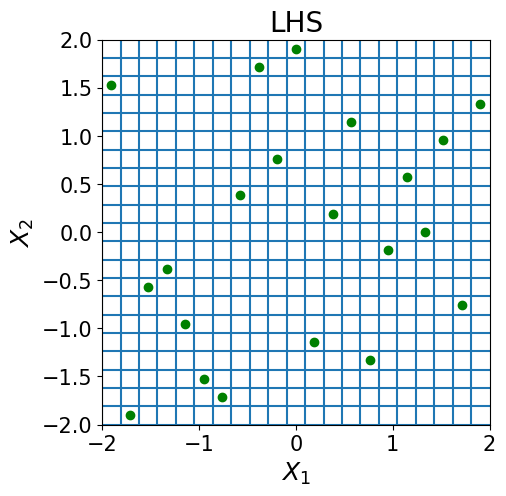

In [7]:
from pyDOE import *

num_samples = 21
dim = 2

bounds1 = [-2.0, 2.0]
bounds2 = [-2.0, 2.0]
#-------------------------------------------------------------------------------------
X_scaled = lhs(dim, samples = num_samples, criterion = 'centermaximin')

X = np.zeros(X_scaled.shape) #initialize
X[:,0] = bounds1[0] + X_scaled[:,0]*(bounds1[1]-bounds1[0])
X[:,1] = bounds2[0] + X_scaled[:,1]*(bounds2[1]-bounds2[0])
#plot the generated data, LHS design
fig, ax = plt.subplots(figsize = [5,5], dpi = 100)

ax.plot(X[:,0], X[:,1],'o', ms=6,markerfacecolor='green',markeredgecolor='green',alpha=1.);
ax.set_xlim([bounds1[0],bounds1[1]])
ax.set_ylim([bounds2[0],bounds2[1]])
for i in np.arange(bounds1[0],bounds1[1],(bounds1[1]-bounds1[0])/num_samples):
    ax.axvline(i)
for i in np.arange(bounds2[0],bounds2[1],(bounds2[1]-bounds2[0])/num_samples):
    ax.axhline(i)
    
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('$X_1$', fontsize=18)
ax.set_ylabel('$X_2$', fontsize=18)
ax.set_title('LHS', fontsize=20)

hyper parameter combinations for grid search : 576
hyper parameter tuning time (sec): 905.2314555644989
{'bestModel': MLPRegressor(alpha=0.01, hidden_layer_sizes=(40, 40, 30),
             learning_rate_init=0.01, max_iter=10000), 'opt_params': {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (40, 40, 30), 'learning_rate_init': 0.01}} 


Text(0.5, 46.16666666666663, 'original data')

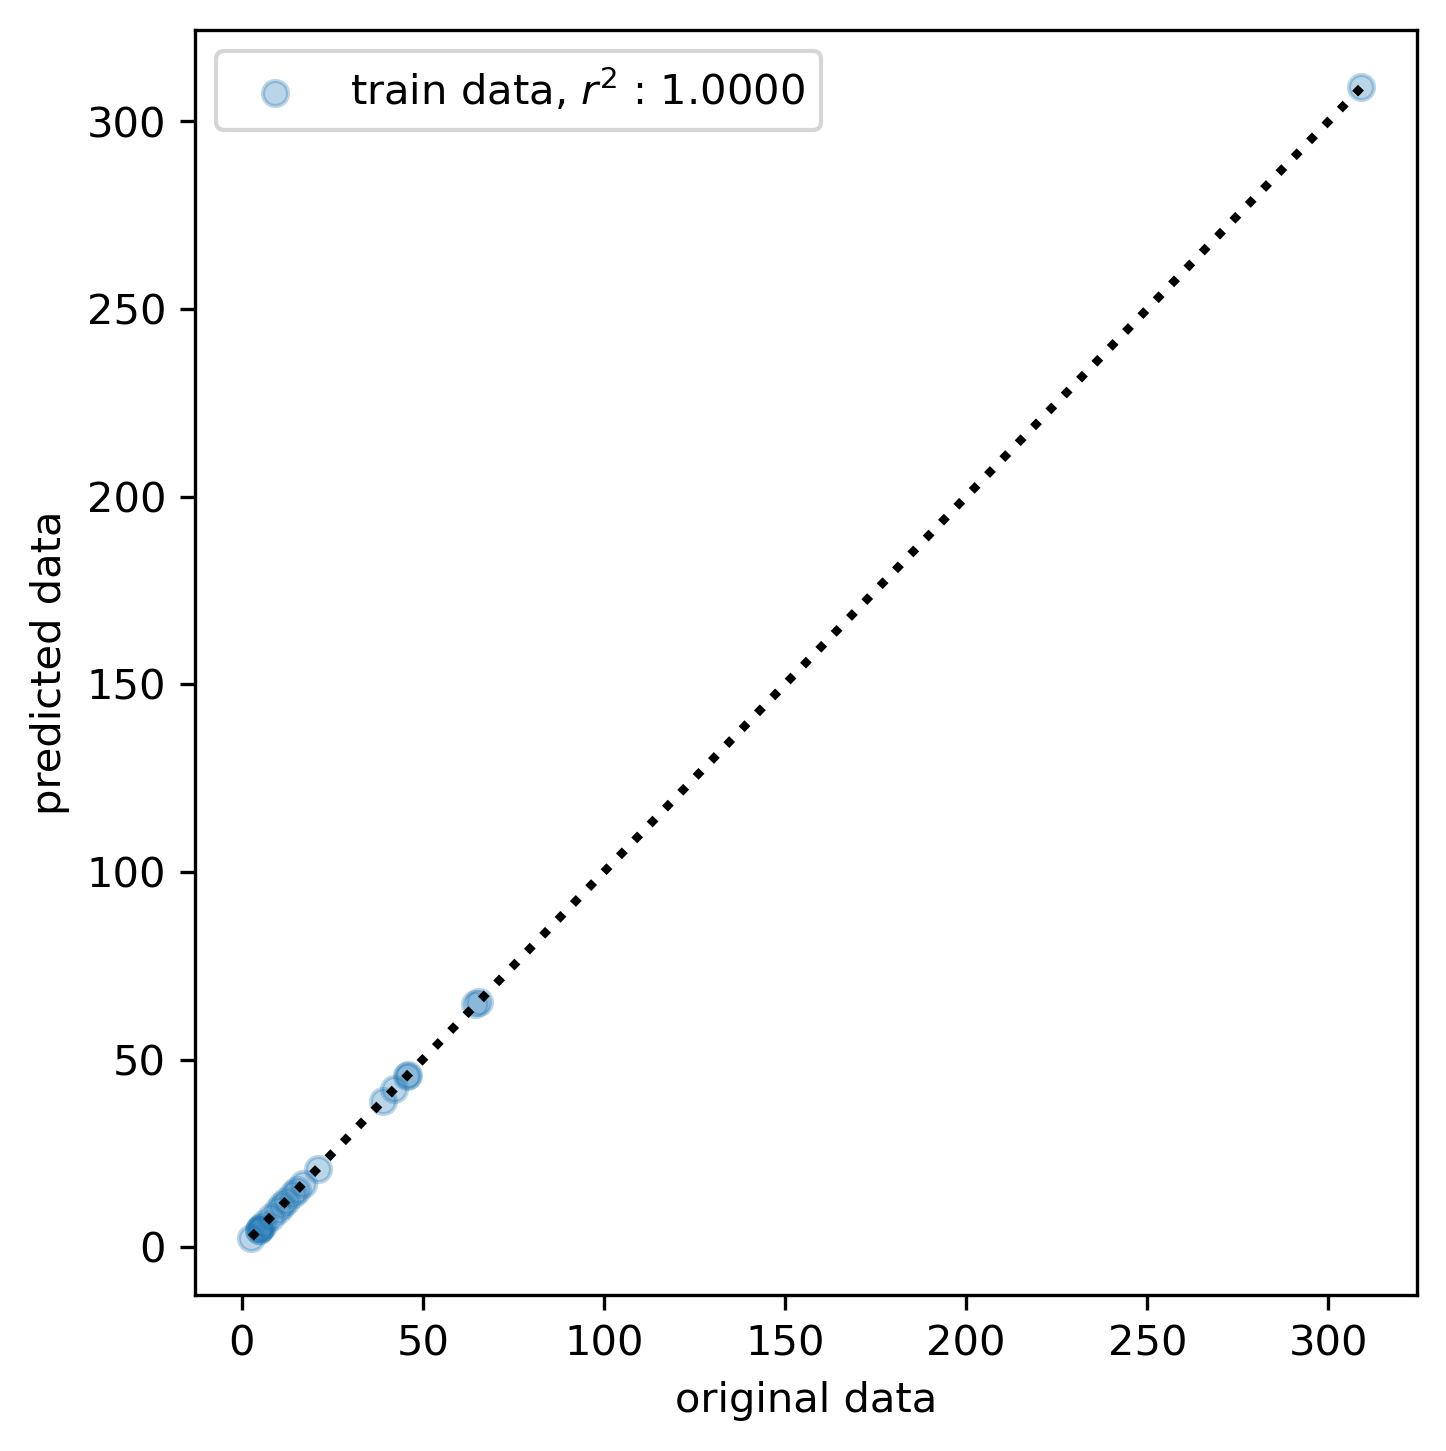

In [8]:
## This is a sample you do not really have to do it this way and,
## do not necessarily use these many hyper parameters for grid search


import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import time
start_time = time.time()

def NN_gridsearch(x, y, param_grid):
    
    NN = MLPRegressor(max_iter = 10000)
    NN_search = GridSearchCV(NN, param_grid, cv=10)
    NN_search.fit(x, y)
    NN_best_reg = {'bestModel': NN_search.best_estimator_,\
                   'opt_params': NN_search.best_params_}
    return NN_best_reg


def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)


y = bb(X[:,0], X[:,1]) # calculate the function values

Log_alphas = np.linspace(-2, 1, 4)
alphas = np.power(10, Log_alphas)


nodes = np.array([30,40,50])  
hidden_layers = [x for x in itertools.product(tuple(nodes),repeat=2)] + [x for x in itertools.product(tuple(nodes),repeat=3)]
learning_rates = [0.01, 0.1]
activations =  ['tanh', 'relu']
parameters_grid = {'alpha': alphas, 'hidden_layer_sizes': hidden_layers, \
                   'learning_rate_init': learning_rates, 'activation' : activations}

print('hyper parameter combinations for grid search : ' \
      + str(len(hidden_layers)*len(activations)*len(alphas)*len(learning_rates)))



bestNN = NN_gridsearch(X, y, parameters_grid)

print('hyper parameter tuning time (sec): ' + str((time.time() - start_time)))

print(colored(50, 0, 255, bestNN))

y_predicted = bestNN['bestModel'].predict(X)
r2_score = r2_score(y, y_predicted)

fig, axes = plt.subplots(figsize=(4,4), dpi = 300)
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
axes.plot([min(y), max(y)], [min(y), max(y)], 'k:', lw=2)
axes.scatter(y, y_predicted, marker='o', alpha=0.3, \
                   label = 'train data, $r^2$ : {0:.4f}'.format(r2_score))
axes.legend(loc="best")
axes.set_ylabel('predicted data')
axes.set_xlabel('original data')

(None, None)

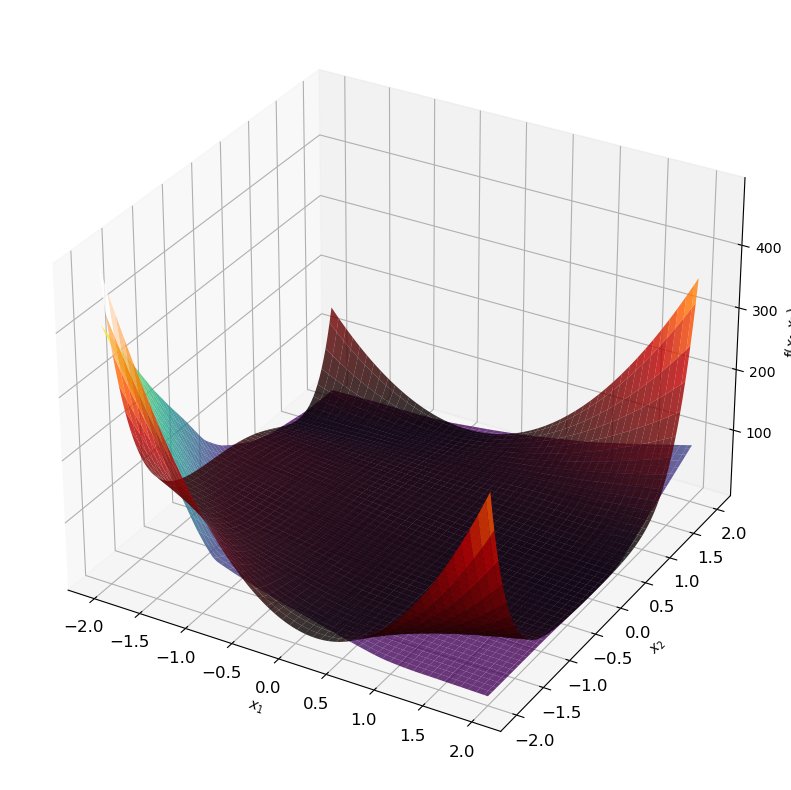

In [14]:
#------------------------------------------------------------------------------------------------------------------
#plotting (x1,x2) vs BB
X1,X2 = np.meshgrid(np.linspace(-2.0,2.0,100),np.linspace(-2.0,2.0,100))
F = bb(X1,X2)
fig = plt.figure(figsize = [12,10])
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, F, cmap='gist_heat',alpha=0.8, edgecolor='none')
ax.set(xlabel = '$x_1$', ylabel ='$x_2$', zlabel = 'f($x_1$,$x_2$)') 
ax.xaxis.set_tick_params(labelsize=12), ax.yaxis.set_tick_params(labelsize=12)


#------------------------------------------------------------------------------------------------------------------
#plotting (x1,x2) vs NN prediction
X1,X2 = np.meshgrid(np.linspace(-2.0,2.0,100),np.linspace(-2.0,2.0,100))
F_NN = np.zeros(X1.shape)
for i in range(X1.shape[1]):
    F_NN[:,i] = bestNN['bestModel'].predict( np.vstack((X1[:,i],X2[:,i])).T )
# fig = plt.figure(figsize = [12,10])
# ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, F_NN, cmap='viridis',alpha=0.8, edgecolor='none')
ax.set(xlabel = '$x_1$', ylabel ='$x_2$', zlabel = 'f($x_1$,$x_2$)') 
ax.xaxis.set_tick_params(labelsize=12), ax.yaxis.set_tick_params(labelsize=12)
